In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [50]:
# Define the symbols for the Treasury yield and the stock
treasury_symbol = "^TNX"  # Replace with the Treasury yield symbol (e.g., 10-year yield)
stock_symbol = "AAPL"     # Replace with the stock symbol you want to analyze



In [51]:
# Define the date range for data retrieval
start_date = "2020-01-01"
end_date = "2022-12-31"

In [52]:
# Download historical Treasury yield data
treasury_data = yf.download(treasury_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [53]:
# Calculate daily percentage changes in Treasury yield
treasury_data['Yield_Return'] = treasury_data['Adj Close'].pct_change().dropna()

In [54]:
# Download historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily stock returns
stock_data['Stock_Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1)).dropna()


[*********************100%%**********************]  1 of 1 completed


In [55]:
# Combine the Treasury yield and stock return data
data = pd.merge(treasury_data, stock_data, left_index=True, right_index=True)

In [56]:
data.dropna()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Yield_Return,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Stock_Return
Date,,,,,,,,,,,,,,
2020-01-03,1.828,1.840,1.786,1.788,1.788,0,-0.049947,74.287498,75.144997,74.125000,74.357498,72.536903,146322800,-0.009769
2020-01-06,1.785,1.816,1.766,1.811,1.811,0,0.012864,73.447502,74.989998,73.187500,74.949997,73.114883,118387200,0.007937
2020-01-07,1.797,1.828,1.797,1.827,1.827,0,0.008835,74.959999,75.224998,74.370003,74.597504,72.771011,108872000,-0.004714
2020-01-08,1.823,1.876,1.802,1.874,1.874,0,0.025725,74.290001,76.110001,74.290001,75.797501,73.941635,132079200,0.015958
2020-01-09,1.869,1.900,1.851,1.858,1.858,0,-0.008538,76.809998,77.607498,76.550003,77.407501,75.512222,170108400,0.021018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.701,3.753,3.695,3.751,3.751,0,0.022349,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002802
2022-12-27,3.787,3.862,3.787,3.860,3.860,0,0.029059,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013976
2022-12-28,3.818,3.890,3.815,3.887,3.887,0,0.006995,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.031166


In [57]:
# Perform log-linear regression
X = data['Yield_Return'].dropna()
X = sm.add_constant(X)  # Add an intercept term
y = data['Stock_Return'].dropna()

In [58]:
X

,const,Yield_Return
Date,,
2020-01-03,1.0,-0.049947
2020-01-06,1.0,0.012864
2020-01-07,1.0,0.008835
2020-01-08,1.0,0.025725
2020-01-09,1.0,-0.008538
...,...,...
2022-12-23,1.0,0.022349
2022-12-27,1.0,0.029059
2022-12-28,1.0,0.006995


In [59]:
model = sm.OLS(y, X).fit()

In [42]:
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock_Return   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     26.34
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.65e-07
Time:                        21:00:38   Log-Likelihood:                 1781.9
No. Observations:                 755   AIC:                            -3560.
Df Residuals:                     753   BIC:                            -3551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.001      0.682   

In [60]:
# Calculate the regression summary
summary = model.summary()

In [61]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock_Return   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     26.34
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.65e-07
Time:                        21:36:53   Log-Likelihood:                 1781.9
No. Observations:                 755   AIC:                            -3560.
Df Residuals:                     753   BIC:                            -3551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.001      0.682      0.495      -0.001       0.002
Yield_Return     0.0877      0.017      5.132      0.000       0.054       0.121
==============================================================================
Omnibus:                       61.976   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.725
Skew:                          -0.040   Prob(JB):                     3.74e-70
Kurtosis:                       6.187   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate R-squared
r_squared = model.rsquared

In [63]:
r_squared

0.03379324327047961

In [64]:
import matplotlib.pyplot as plt 

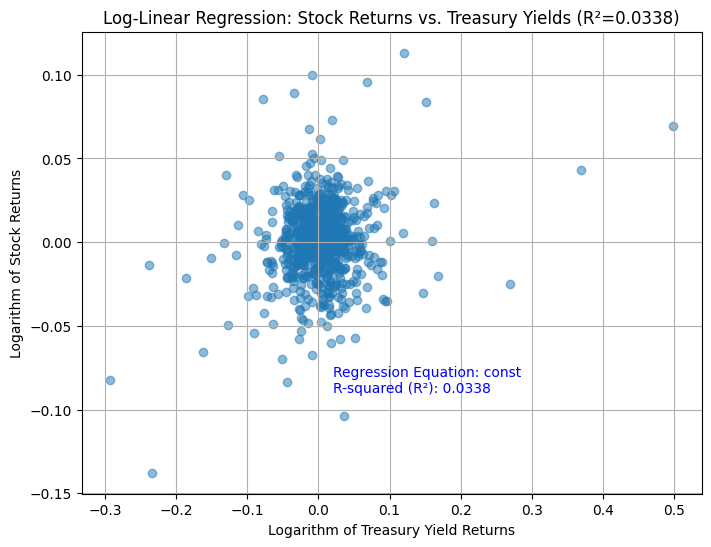

In [65]:
# Create a scatterplot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(data['Yield_Return'], data['Stock_Return'], alpha=0.5)
plt.title(f'Log-Linear Regression: Stock Returns vs. Treasury Yields (R²={r_squared:.4f})')
plt.xlabel('Logarithm of Treasury Yield Returns')
plt.ylabel('Logarithm of Stock Returns')
plt.grid(True)

# Display the regression equation and R-squared value on the plot
plt.text(0.02, -0.08, f'Regression Equation: {summary.tables[1][1][0]}', fontsize=10, color='blue')
plt.text(0.02, -0.09, f'R-squared (R²): {r_squared:.4f}', fontsize=10, color='blue')

# Show the plot
plt.show()